        pre_speeds  post_speeds
count  1664.000000  1675.000000
mean     16.322115    15.373134
std       1.534793     1.452923
min       9.000000    10.000000
25%      15.000000    14.000000
50%      16.000000    15.000000
75%      17.000000    16.000000
max      24.000000    20.000000
Weighted Pre-Treatment Speed: 15.96 mph
Weighted Post-Treatment Speed: 15.41 mph
T-Statistic: 29.369, P-Value: 0.000


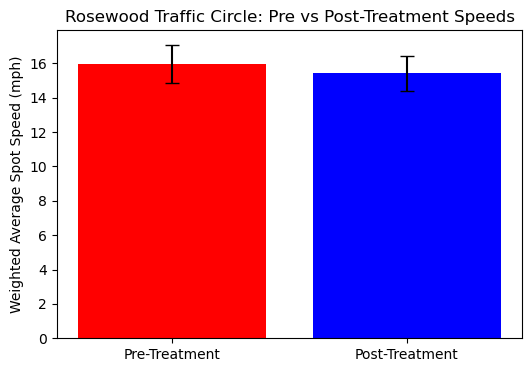

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

pre_treatment = pd.read_csv('data/Rosewood_pre.csv')
post_treatment = pd.read_csv('data/Rosewood_post.csv')
filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
pre_treatment = pre_treatment[~filters]
filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')
post_treatment = post_treatment[~filters]

pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (mph)')
plt.title('Rosewood Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

        pre_speeds  post_speeds
count  1664.000000  1675.000000
mean     16.322115    15.373134
std       1.534793     1.452923
min       9.000000    10.000000
25%      15.000000    14.000000
50%      16.000000    15.000000
75%      17.000000    16.000000
max      24.000000    20.000000
Weighted Pre-Treatment Speed: 15.96 mph
Weighted Post-Treatment Speed: 15.41 mph
T-Statistic: 29.369, P-Value: 0.000


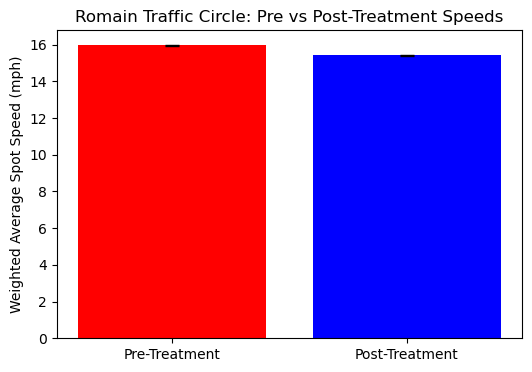

In [2]:
filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
pre_treatment = pre_treatment[~filters]
filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')
post_treatment = post_treatment[~filters]

pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_se = pre_weighted_std / (len(pre_speeds) ** 0.5)
post_weighted_se = post_weighted_std / (len(post_speeds) ** 0.5)


valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (mph)')
plt.title('Romain Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

In [3]:
top_speed = pre_treatment.sort_values('Avg Spot Speed (mph)', ascending = False).head(10)
top_speed

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
1855,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West Rosewood Avenue,yes,270,yes,2021-08,5: Friday (F-F),1: Early AM (12am-6am),10,24.0,37.577,0.635,NaN,NaN,NaN,NaN
1861,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West Rosewood Avenue,yes,270,yes,2021-08,6: Saturday (Sa-Sa),1: Early AM (12am-6am),10,23.0,37.577,0.623,NaN,NaN,NaN,NaN
2137,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West Rosewood Avenue,yes,270,yes,2022-02,4: Thursday (Th-Th),1: Early AM (12am-6am),7,21.0,26.862,0.799,NaN,NaN,NaN,NaN
583,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-06,1: Monday (M-M),1: Early AM (12am-6am),90,21.0,22.179,0.930,15.0,17.0,24.0,26.0
979,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2022-02,3: Wednesday (W-W),1: Early AM (12am-6am),57,21.0,22.489,0.924,15.0,17.0,24.0,29.0
883,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-12,3: Wednesday (W-W),1: Early AM (12am-6am),42,21.0,21.155,1.000,15.0,18.0,26.0,30.0
835,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-11,3: Wednesday (W-W),1: Early AM (12am-6am),61,21.0,22.574,0.912,17.0,18.0,25.0,28.0
739,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-09,3: Wednesday (W-W),1: Early AM (12am-6am),65,21.0,22.447,0.917,7.0,17.0,25.0,36.0
745,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-09,4: Thursday (Th-Th),1: Early AM (12am-6am),73,21.0,22.447,0.917,11.0,16.0,25.0,34.0
955,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2022-01,7: Sunday (Su-Su),1: Early AM (12am-6am),96,21.0,21.783,0.945,15.0,17.0,24.0,27.0


In [4]:
pre_treatment['Zone Name'].unique()

array(['East Rosewood Avenue', 'North Martel Avenue',
       'South Martel Avenue (1)', 'West Rosewood Avenue'], dtype=object)

## Z score filter

In [5]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]


Weighted Pre-Treatment 85th Speed Percentile: 19.43 mph
Weighted Post-Treatment 85th Speed Percentile: 18.60 mph
Weighted Pre-Treatment 95th Speed Percentile: 22.02 mph
Weighted Post-Treatment 95th Speed Percentile: 21.05 mph


In [6]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Spot Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Spot Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")


Total Pre-Treatment Volume: 866,151
Total Post-Treatment Volume: 869,035
Combined Volume (Pre + Post): 1,735,186


Pre-treatment data size before filtering: (1680, 18)
Pre-treatment data size after filtering: (1536, 18)
Post-treatment data size before filtering: (1680, 18)
Post-treatment data size after filtering: (1556, 18)
Weighted Pre-Treatment Speed: 15.96 mph
Weighted Post-Treatment Speed: 15.41 mph
T-Statistic: 31.729, P-Value: 0.000


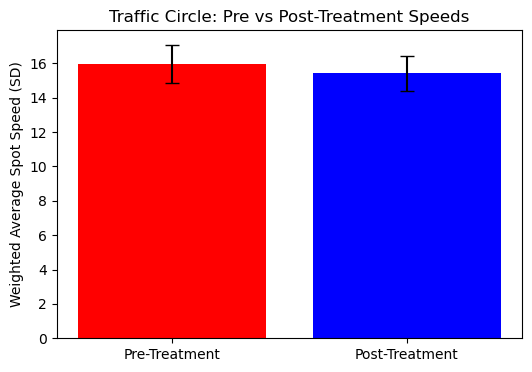

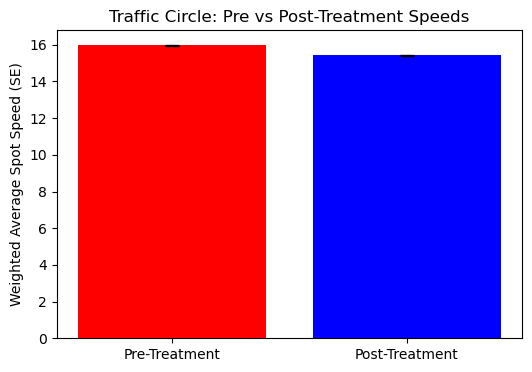

Highest value for pre-treatment'85th Speed Percentile': 26.0 mph Highest value for post-treatment'85th Speed Percentile': 24.0 mph
Row details:
Data Periods                                          Jun 01, 2021 - Jun 01, 2022
Mode of Travel                             All Vehicles - StL All Vehicles Volume
Zone ID                                                                       NaN
Zone Name                                                     North Martel Avenue
Zone Is Pass-Through                                                          yes
Zone Direction (degrees)                                                        0
Zone is Bi-Direction                                                          yes
Year-Month                                                                2021-11
Day Type                                                          5: Friday (F-F)
Day Part                                                   1: Early AM (12am-6am)
Average Daily Spot Traffic (StL Volu

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
1862,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West Rosewood Avenue,yes,270,yes,2021-08,6: Saturday (Sa-Sa),2: Peak AM (6am-10am),29,20.0,37.577,0.545,15.0,15.0,27.0,76.0
2299,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West Rosewood Avenue,yes,270,yes,2022-05,7: Sunday (Su-Su),1: Early AM (12am-6am),23,19.0,20.294,0.922,9.0,11.0,25.0,36.0
739,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-09,3: Wednesday (W-W),1: Early AM (12am-6am),65,21.0,22.447,0.917,7.0,17.0,25.0,36.0
745,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-09,4: Thursday (Th-Th),1: Early AM (12am-6am),73,21.0,22.447,0.917,11.0,16.0,25.0,34.0
1315,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Martel Avenue (1),yes,0,yes,2021-09,3: Wednesday (W-W),1: Early AM (12am-6am),61,19.0,19.132,0.988,14.0,14.0,21.0,33.0
1765,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West Rosewood Avenue,yes,270,yes,2021-06,6: Saturday (Sa-Sa),1: Early AM (12am-6am),52,15.0,23.316,0.630,4.0,8.0,19.0,32.0
823,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-11,1: Monday (M-M),1: Early AM (12am-6am),71,20.0,22.574,0.877,13.0,15.0,24.0,32.0
985,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2022-02,4: Thursday (Th-Th),1: Early AM (12am-6am),74,20.0,22.489,0.902,13.0,16.0,25.0,31.0
883,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-12,3: Wednesday (W-W),1: Early AM (12am-6am),42,21.0,21.155,1.000,15.0,18.0,26.0,30.0
691,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Martel Avenue,yes,0,yes,2021-08,3: Wednesday (W-W),1: Early AM (12am-6am),54,20.0,20.866,0.944,3.0,16.0,25.0,30.0


In [7]:
pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

def filter_outliers(df, column, threshold=3):
    valid_values = df[column].dropna()
    z_scores = stats.zscore(valid_values)
    valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    return df.loc[valid_indices]

pre_treatment_filtered = filter_outliers(pre_treatment, '85th Speed Percentile')
post_treatment_filtered = filter_outliers(post_treatment, '85th Speed Percentile')

print("Pre-treatment data size before filtering:", pre_treatment.shape)
print("Pre-treatment data size after filtering:", pre_treatment_filtered.shape)
print("Post-treatment data size before filtering:", post_treatment.shape)
print("Post-treatment data size after filtering:", post_treatment_filtered.shape)

pre_speeds = pre_treatment_filtered['Avg Spot Speed (mph)']
post_speeds = post_treatment_filtered['Avg Spot Speed (mph)']
pre_volume = pre_treatment_filtered['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment_filtered['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment_filtered.loc[pre_treatment_filtered['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment_filtered.loc[post_treatment_filtered['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

In [9]:
results = {
    'Intersection': 'Rosewood Ave & Martel Ave',
'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Treatment_Volume': int(total_pre_volume),
    'Post_Treatment_Volume': int(total_post_volume),
    'Combined_Volumne': int(total_combined_volume)
}

import json
with open('../results/Rosewood Ave & Martel Ave_summary.json', 'w') as f:
    json.dump(results, f)